In [26]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import folium

In [4]:
df = pd.read_csv("C:/Users/USER/Downloads/archive (5)/volcano_data_2010.csv")

In [5]:
df.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,...,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,...,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


### Pick only the columns that we Need.

In [9]:
df1 = df.loc[:, ['Year', 'Name', 'Country', 'Latitude', 'Longitude', 'Type']].copy()

In [10]:
df1.head()

,Year,Name,Country,Latitude,Longitude,Type
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano


In [12]:
geometry = gpd.points_from_xy(df1.Longitude, df1.Latitude)

In [14]:
geo_df = gpd.GeoDataFrame(df[['Year', 'Name', 'Country', 'Latitude', 'Longitude', 'Type']], geometry = geometry)

In [15]:
geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [16]:
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

In [17]:
world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


## CREATING A STATIC MAP/PLOT

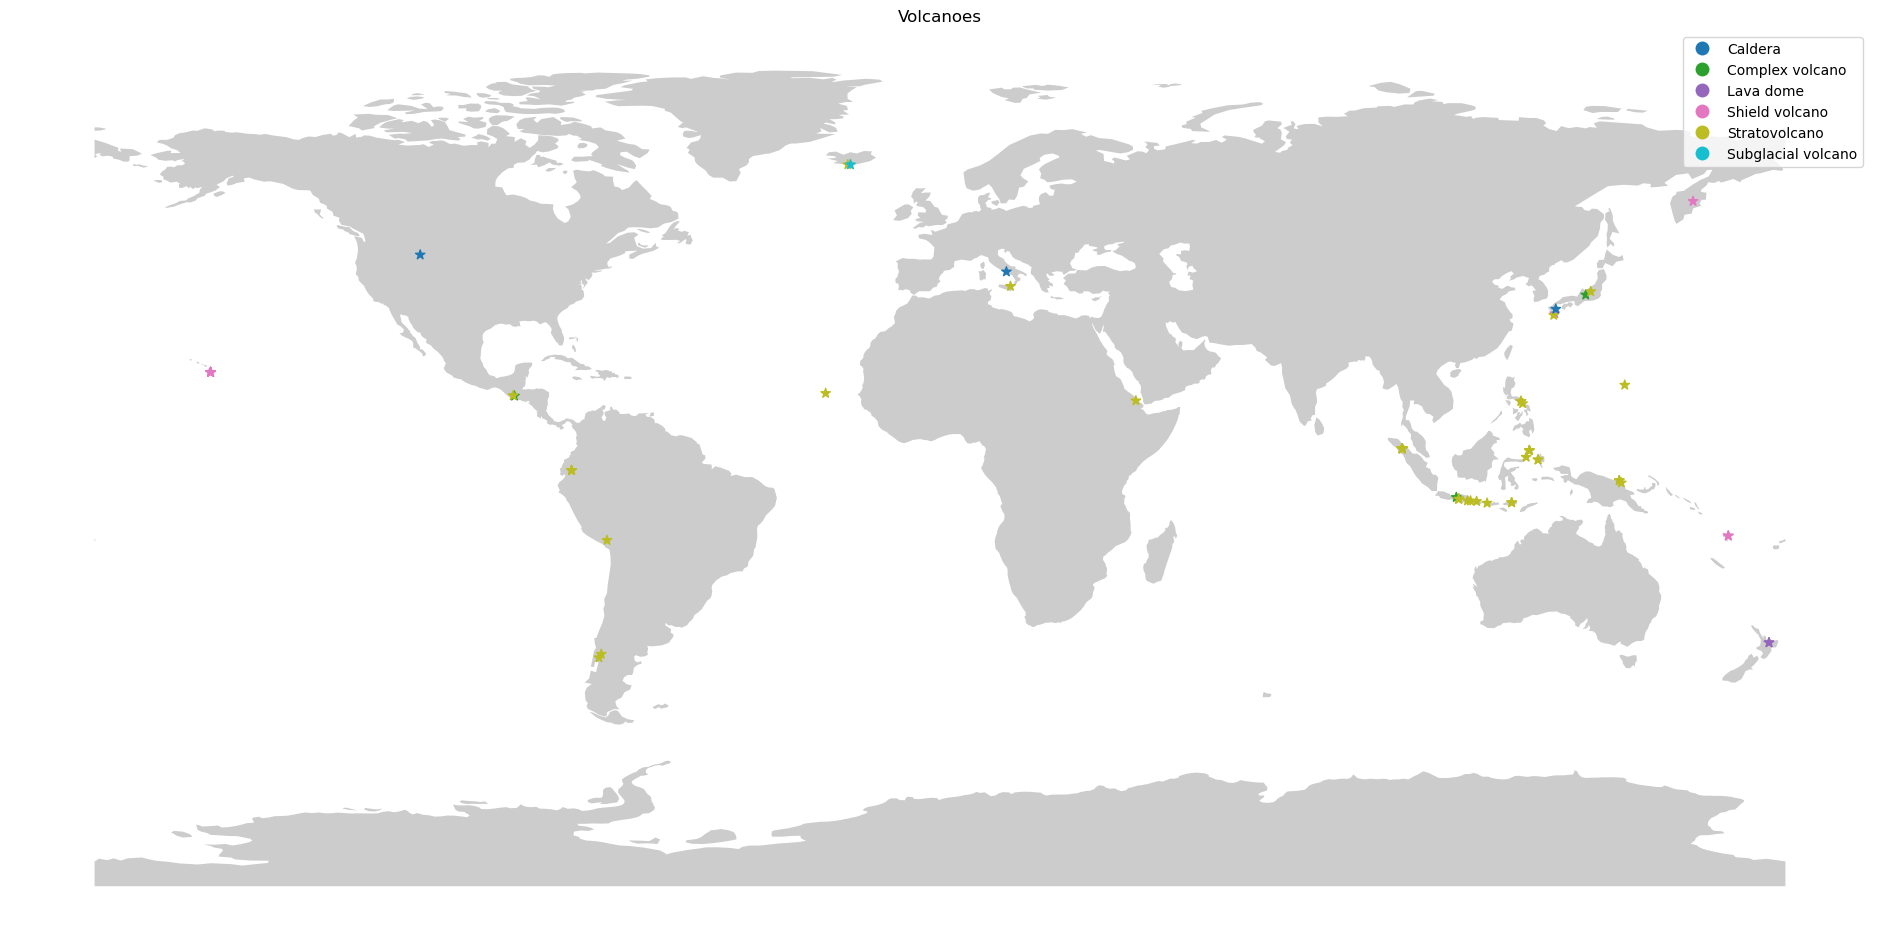

In [33]:
fig, ax = plt.subplots(figsize = (24, 18))
ax.set_axis_off()

world.plot(
    ax=ax,
    color = 'grey',
    alpha = 0.4,
)

geo_df.plot(
    ax=ax,
    column = 'Type',
    marker = '*',
    markersize = 50,
    legend = True
)
plt.title('Volcanoes')
plt.show()

In [30]:
map1 = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

In [31]:
map1